# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Line search

</font>
</div>

# General overview of the available methods
<hr style="border:2px solid black"> </hr>

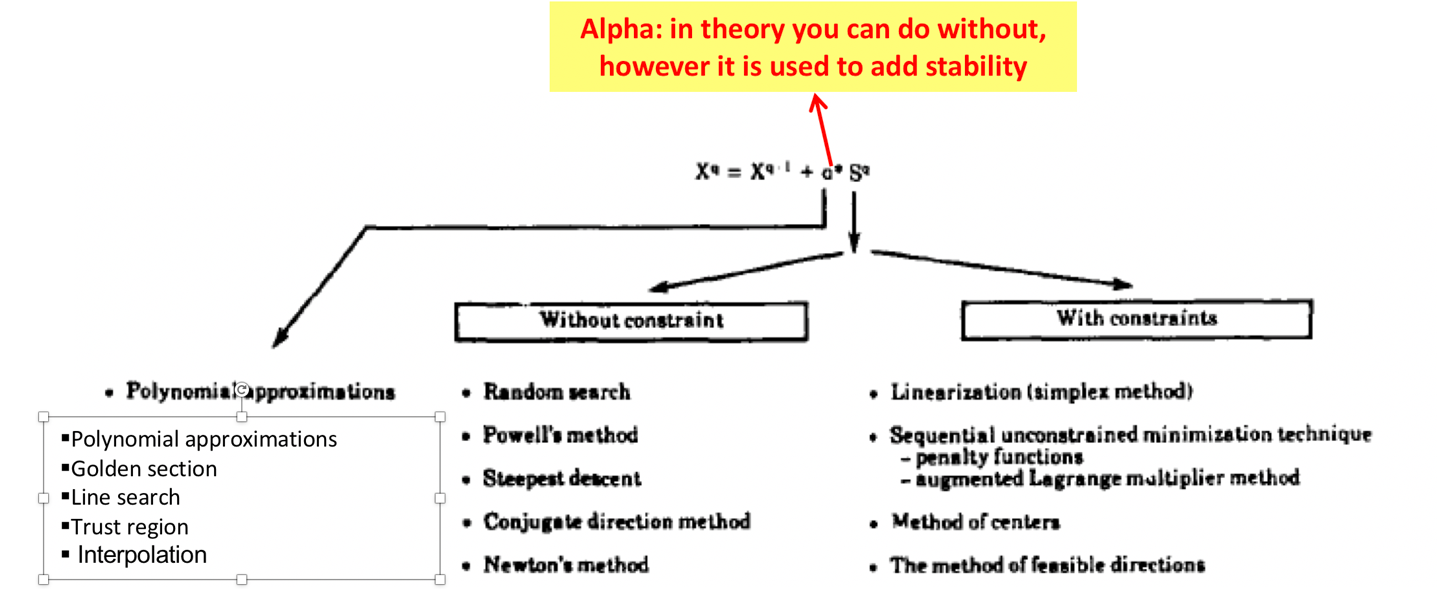

# Import modules
<hr style="border:2px solid black"> </hr>

In [13]:
from numpy import arange
from scipy.optimize import line_search
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

# Objective function
<hr style="border:2px solid black"> </hr>

In [6]:
def objective(x):
    return (-5.0 + x)**2.0

def gradient(x):
    return 2.0 * (-5.0 + x)

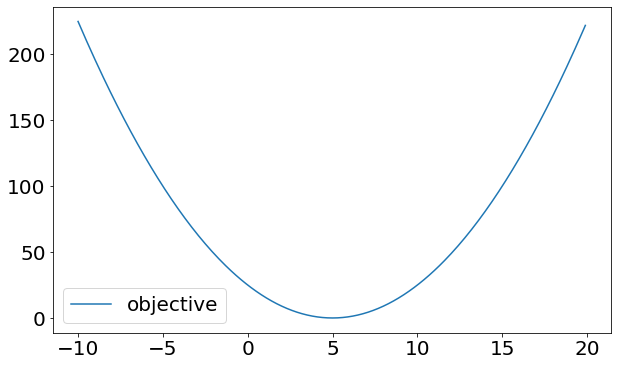

In [12]:
rcParams['figure.figsize'] = 10, 6
rcParams['font.size'] = 20

# define range
r_min, r_max = -10.0, 20.0
inputs = arange(r_min, r_max, 0.1)

targets = [objective(x) for x in inputs]
plt.plot(inputs, targets, '-', label='objective')
plt.legend()
plt.show()

# Perform the Line Search
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The algorithm requires an initial position in the search space and a direction along which to search. It will then choose the next position in the search space from the initial position that results in a better or best objective function evaluation.

- The **direction** is a magnitude indicating both the sign (positive or negative) along the line and the maximum extent to which to search. Therefore, the direction is better thought of as the candidate search region and must be large enough to encompass the optima, or a point better than the starting point.

- The line search will automatically choose the scale factor called alpha for the step size (the direction) from the current position that minimizes the objective function. This involves using **another** univariate optimization algorithm to find the optimal point in the chosen direction in order to select the appropriate alpha.

- Alpha is a scale factor for the direction, as such only values in the range between 0.0 and 1.0 are considered in the search. A single step of the line search solves a minimization problem that minimizes the objective function for the current position plus the scaled direction: `minimize objective(position + alpha * direction)`

- As such, the line search operates in one dimension at a time and returns the distance to move in a chosen direction.

</font>
</div>

In [14]:
# define the starting point
point = -5.0

# define the direction to move.
direction = 100.0

# print the initial conditions
print('start=%.1f, direction=%.1f' % (point, direction))
# perform the line search
result = line_search(objective, gradient, point, direction)

# summarize the result
alpha = result[0]
print('Alpha: %.3f' % alpha)
print('Function evaluations: %d' % result[1])

# define objective function minima
end = point + alpha * direction
# evaluate objective function minima
print('f(end) = f(%.3f) = %.3f' % (end, objective(end)))



start=-5.0, direction=100.0
Alpha: 0.100
Function evaluations: 3
f(end) = f(5.000) = 0.000


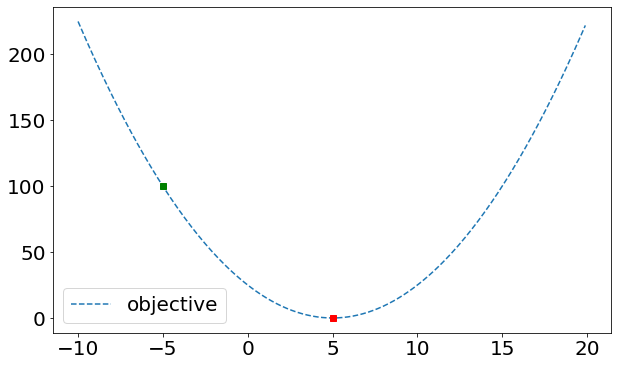

In [15]:
# define range
r_min, r_max = -10.0, 20.0
# prepare inputs
inputs = arange(r_min, r_max, 0.1)
# compute targets
targets = [objective(x) for x in inputs]
# plot inputs vs objective
pyplot.plot(inputs, targets, '--', label='objective')
# plot start and end of the search
pyplot.plot([point], [objective(point)], 's', color='g')
pyplot.plot([end], [objective(end)], 's', color='r')
pyplot.legend()
pyplot.show()

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/line-search-optimization-with-python/
- Alexandrov, Natalia M., et al. "Approximation and model management in aerodynamic optimization with variable-fidelity models." Journal of Aircraft 38.6 (2001): 1093-1101.
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.line_search.html

</font>
</div>